/var/folders/sd/84ff65hx4d5cnfcytc17qp_r0000gn/T/ipykernel_60861/2931524242.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['all'])


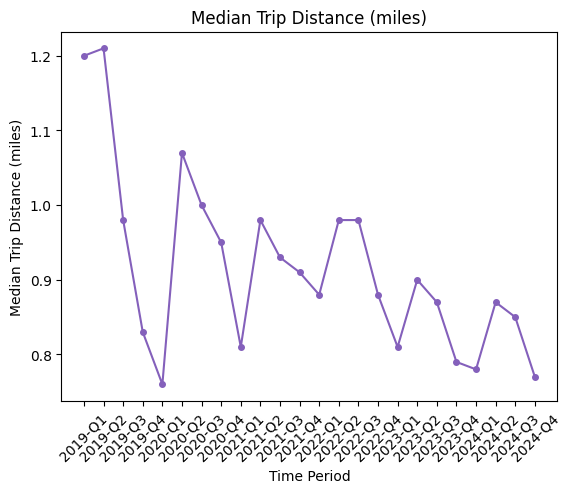

<Figure size 1600x800 with 0 Axes>

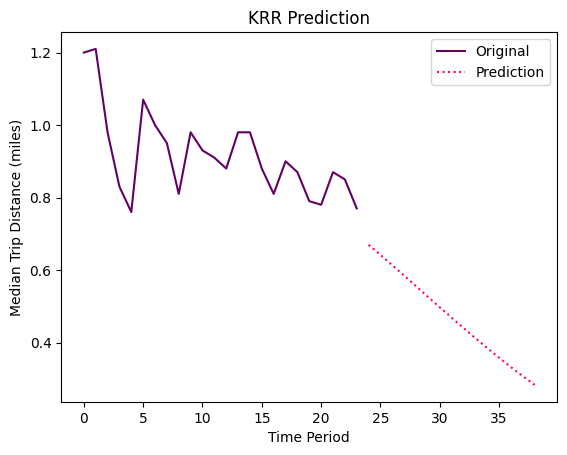

/opt/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


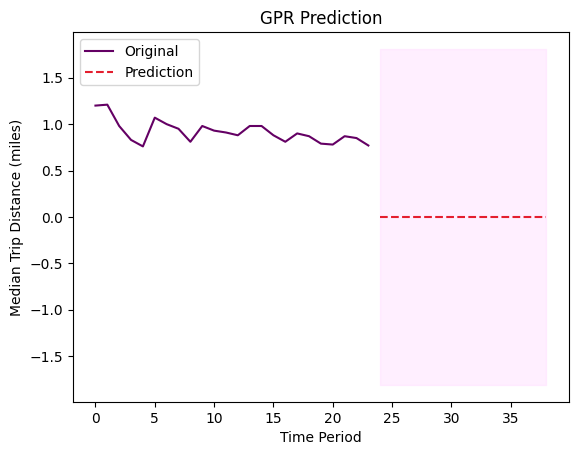

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("dc-metrics-data-for-scooter.csv")
#print(df)
df = df.drop(['all'])
#print(df)
#print(df.index)
df = df.reset_index()
df = df.drop(columns=['Total MDS Trips', 'Total Distance (miles)'])
df.columns = ['Time Period', 'Median Trip Distance (miles)', 'Median Trip Duration (minutes)', 'Average Trip Distance (miles)', 'Average Trip Duration (minutes)', 'Average Trips per Day', 'Total Distance (miles)', 'Total MDS Trips']
#print(df)

#plt.subplots(2, 2, figsize=(16, 14))
#plt.subplots(2, 2, figsize=(10, 8))

#Trip Distance Graph
x = df['Time Period']
y = df['Median Trip Distance (miles)']
#y2 = df['Average Trip Distance (miles)']
#plt.subplot(2, 2, 1)
plt.plot(x, y, label = "Median", color = "#8460bb", marker = 'o', markersize = 4) #purple
#plt.plot(x, y2, label = "Average", color = "#6F91FF", marker = 's', markersize = 4) #blue
plt.title('Median Trip Distance (miles)')
plt.xlabel('Time Period')
plt.ylabel('Median Trip Distance (miles)')
plt.xticks(rotation = 45)
#plt.legend()
plt.figure(figsize=(16, 8))
plt.show()

df['Time Period'] = range(len(df))
x1 = df[['Time Period']].values  #0-24 listed out
y1 = df['Median Trip Distance (miles)'].values  #all median trip values listed out

scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)
next_x1 = np.arange(len(df), len(df) + 15).reshape(-1, 1)
next_x1_scaled = scaler.transform(next_x1)

#Kernel
krr = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)
krr.fit(x1_scaled, y1)
y1_pred = krr.predict(next_x1_scaled)

#plt.subplot(2, 2, 3)
plt.plot(x1, y1, label='Original', color='#640064')
plt.plot(next_x1, y1_pred,label = 'Prediction', color='#ff0071', linestyle='dotted')
plt.xlabel('Time Period')
plt.ylabel('Median Trip Distance (miles)')
plt.legend()
plt.title('KRR Prediction')
plt.show()

#Gaussian 
kernel = C(1.0) * RBF(1.0) #C --> constant multiplier, RBF --> Radial Basis Function
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(x1_scaled, y)
y_pred, sigma = gpr.predict(next_x1_scaled, return_std=True)

#plt.subplot(2, 2, 4)
plt.plot(x1, y1, label='Original', color='#640064')
plt.plot(next_x1, y_pred, label='Prediction', color='#e41e2e', linestyle='dashed')
plt.fill_between(next_x1.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color = '#ffccff', alpha = 0.3)
plt.xlabel('Time Period')
plt.ylabel('Median Trip Distance (miles)')
plt.legend()
plt.title('GPR Prediction')
plt.show()